<a href="https://colab.research.google.com/github/xxxnmxhj00/Pythorch/blob/main/%5Btorch_2%5D%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B5%AC%EC%84%B1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Super()로 기반 클래스 초기화

In [ ]:
class Person:
  def __init__(self):
    self.hello = '안녕하세요.'

class Student(Person):
  def __init__(self):
    self.school = '디지털스마트부산아카데미'

dp = Student()
print(dp.school)
print(dp.hello) # 부모 클래스의 속성을 출력하려고 하면 에러가 발생

디지털스마트부산아카데미


AttributeError: 'Student' object has no attribute 'hello'

In [ ]:
class Person:
  def __init__(self):
    self.hello = '안녕하세요.'

class Student(Person):
  def __init__(self):
    super().__init__() # super()로 기반 클래스의 __init__ 메서드를 호출
    self.school = '디지털스마트부산아카데미'

dp = Student()
print(dp.school)
print(dp.hello) # 부모 클래스의 속성을 출력하려고 하면 에러가 발생

디지털스마트부산아카데미
안녕하세요.


## 클래스를 초기화하지 않아도 되는 경우

In [ ]:
class Person:
  def __init__(self): # 함수가 실행됐을때 1번만 실행됨
    self.hello = '안녕하세요.'

class Student(Person):
  pass

dp = Student()
print(dp.hello)

안녕하세요.


In [ ]:
!pip install -U --no-cache-dir gdown --pre
print("Downloading...")
!gdown --id {"1NDg2_ccmxkWDu2e_2hsngYI5pzY4qWkW"} -O reg.csv

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NDg2_ccmxkWDu2e_2hsngYI5pzY4qWkW
To: /content/reg.csv
100% 138k/138k [00:00<00:00, 66.7MB/s]


모델 구조 및 가중치 확인

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchsummary import summary

In [ ]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(13, 50) # 입력 레이어에서 은닉 레이어1로
        self.fc2 = nn.Linear(50, 30) # 은닉 레이어1에서 은닉 레이어2로
        self.fc3 = nn.Linear(30, 1) # 은닉 레이어2에서 출력 레이어로
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.fc1(x)) # 활성화 함수는 relu를 사용
        x = self.dropout(F.relu(self.fc2(x))) # 드롭아웃을 사용
        x = F.relu(self.fc3(x)) # 최종 출력 레이어에는 활성화 함수를 사용하지 않음
        return x

In [ ]:
model = Regressor()
print(model)

Regressor(
  (fc1): Linear(in_features=13, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
for name,param in model.named_parameters():
  print(name, param.size())

fc1.weight torch.Size([50, 13])
fc1.bias torch.Size([50])
fc2.weight torch.Size([30, 50])
fc2.bias torch.Size([30])
fc3.weight torch.Size([1, 30])
fc3.bias torch.Size([1])


In [ ]:
print(model.fc1.weight.size(), model.fc1.bias.size())

torch.Size([50, 13]) torch.Size([50])


In [ ]:
model.fc1.weight # weight 변수로 가중치 확인 가능

Parameter containing:
tensor([[-0.1407, -0.2483,  0.0132, -0.1652, -0.1195,  0.2227, -0.1518, -0.0428,
         -0.1577,  0.1972, -0.0562, -0.0190,  0.1438],
        [ 0.1372,  0.0528,  0.1635,  0.1367,  0.1392, -0.1732,  0.0317, -0.1051,
          0.0997,  0.2686, -0.1929, -0.0273,  0.2258],
        [ 0.0151,  0.0619,  0.2352,  0.1306, -0.0525,  0.0221, -0.1958,  0.2027,
          0.2004,  0.1480, -0.1010,  0.1593,  0.0394],
        [ 0.1088, -0.2718,  0.0736,  0.0342, -0.0727, -0.1168, -0.1149, -0.0798,
         -0.0121, -0.2525,  0.2451,  0.2263,  0.2737],
        [-0.2197,  0.0815,  0.1304, -0.0029,  0.1440,  0.1164, -0.2442,  0.0759,
          0.2429, -0.1376,  0.0649, -0.0039,  0.2353],
        [ 0.2406,  0.1927,  0.1655, -0.1361,  0.2515,  0.0869, -0.0509,  0.0808,
         -0.0624, -0.1027,  0.0181,  0.0317, -0.2471],
        [-0.1640,  0.1120,  0.1902,  0.2605, -0.1403,  0.1730, -0.0085, -0.1552,
          0.0870,  0.1017, -0.0106,  0.2503, -0.0791],
        [-0.2163, -0.0011,

In [ ]:
model.fc1.bias # bias 변수로 편향 확인 가능

Parameter containing:
tensor([ 0.1751, -0.0773,  0.0254, -0.2061,  0.2480,  0.0916, -0.0439, -0.0198,
         0.0426,  0.2693, -0.2582,  0.1095,  0.0976,  0.1864, -0.1835,  0.2529,
         0.1208, -0.2553, -0.2202,  0.1633, -0.1760,  0.1868, -0.2211, -0.2114,
         0.0166, -0.1314, -0.0530, -0.0828, -0.2531,  0.1431, -0.1802,  0.1672,
         0.1751,  0.2595,  0.0585,  0.2444,  0.0307,  0.1184,  0.2028, -0.1204,
        -0.2297,  0.1669, -0.1076, -0.0868,  0.1035, -0.0771, -0.0561,  0.0045,
         0.2461,  0.2428], requires_grad=True)

In [ ]:
summary(model, (10,13))
# Linear 파라미터 수 = (입력 특성의 수 * 출력 뉴런의 수) + 출력 뉴런의 수(절편)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 10, 50]             700
            Linear-2               [-1, 10, 30]           1,530
           Dropout-3               [-1, 10, 30]               0
            Linear-4                [-1, 10, 1]              31
Total params: 2,261
Trainable params: 2,261
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.01
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


## 집값 예측하기

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # 전체 데이터를 학습 데이터와 평가 데이터로 나눈다
# ANN

import torch
from torch import nn, optim # 토치 내의 세부적인 기능을 불러온다 (신경망 기술, 손실함수, 최적화 방법 등)
from torch.utils.data import DataLoader, Dataset # 데이터를 모델에 삳용할 수 있도록 정리해 주는 라이브러리
import torch.nn.functional as F # torch 내의 세부적인 기능을 불러옴 (신경망 기술)

# Loss
from sklearn.metrics import mean_squared_error # Regression 문제의 평가를 위해 MSE를 불러옴
#Plot
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('reg.csv', index_col=[0])
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,Price
0,0.034633,0.206919,0.137057,0.540526,0.193941,0.699239,0.630532,0.239410,0.027375,0.209857,0.347609,0.996394,0.102644,0.422222
1,0.028920,0.014315,0.276113,0.255945,0.618886,0.555407,0.782263,0.482977,0.103031,0.106690,0.520776,0.996650,0.187120,0.368889
2,0.020627,0.033230,0.281116,0.525591,0.165269,0.624102,0.586005,0.272713,0.036010,0.106986,0.595301,0.983284,0.084079,0.660000
3,0.022749,0.033801,0.125044,0.263253,0.251509,0.658532,0.432160,0.344932,0.150018,0.068317,0.651297,0.989989,0.015990,0.631111
4,0.022148,0.029374,0.121057,0.521126,0.399670,0.448086,0.520158,0.495342,0.104383,0.069360,0.560116,0.998723,0.092782,0.693333


In [ ]:
# 데이터를 넘파이 배열로 만들기

X = df.drop('Price',axis=1).to_numpy() # 데이터프레임에서 타겟값(Price)을 제외하고 넘파이 배열로 만들기
Y = df['Price'].to_numpy().reshape((-1,1))

In [ ]:
print(f'X:{X.shape}, Y:{Y.shape}')

X:(506, 13), Y:(506, 1)


In [ ]:
class TensorData(Dataset):
  def __init__(self,x_data, y_data):
    self.x_data = torch.FloatTensor(x_data)
    self.y_data = torch.FloatTensor(y_data)
    self.len = self.y_data.shape[0]

  def __getitem__(self,index):
    return self.x_data[index], self.y_data[index]

  def __len__(self):
    return self.len

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.5)

# 학습 데이터, 시험 데이터 배치 형태로 구축하기
trainsets = TensorData(X_train, Y_train)
trainloader = torch.utils.data.DataLoader(trainsets,batch_size = 32, shuffle=True)

testsets = TensorData(X_train, Y_train)
testloader = torch.utils.data.DataLoader(testsets,batch_size = 32, shuffle=False)


In [ ]:
model = Regressor()
criterion = nn.MSELoss()
#lr은 학습률이다
# weight_decay는 L2 정규화에서의 penalty 정도를 의미|
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)

In [ ]:
loss_ = [] # 그래프를 그리기 위한 loss 저장용 리스트
n = len(trainloader)

for epoch in range(400): # 400번 학습을 진행한다.
    running_loss = 0.0
    for data in trainloader: # 무작위로 섞인 32개 데이터가 있는 배치가 하나 씩 들어온다.
        inputs, values = data # data에는 X, Y가 들어있다.
        optimizer.zero_grad() # 최적화 초기화

        outputs = model(inputs) # 모델에 입력값 대입 후 예측값 산출
        loss = criterion(outputs, values) # 손실 함수 계산
        loss.backward() # 손실 함수 기준으로 역전파 설정
        optimizer.step() # 역전파를 진행하고 가중치 업데이트

        running_loss += loss.item() # epoch 마다 평균 loss를 계산하기 위해 배치 loss를 더한다.
    loss_.append(running_loss/n) # MSE(Mean Squared Error) 계산
    print(f'[{epoch + 1}] loss: {running_loss / n:.4f}')

[1] loss: 0.1270
[2] loss: 0.0816
[3] loss: 0.0691
[4] loss: 0.0586
[5] loss: 0.0537
[6] loss: 0.0411
[7] loss: 0.0454
[8] loss: 0.0389
[9] loss: 0.0394
[10] loss: 0.0391
[11] loss: 0.0376
[12] loss: 0.0293
[13] loss: 0.0301
[14] loss: 0.0309
[15] loss: 0.0301
[16] loss: 0.0280
[17] loss: 0.0264
[18] loss: 0.0301
[19] loss: 0.0257
[20] loss: 0.0269
[21] loss: 0.0248
[22] loss: 0.0275
[23] loss: 0.0266
[24] loss: 0.0281
[25] loss: 0.0231
[26] loss: 0.0235
[27] loss: 0.0254
[28] loss: 0.0225
[29] loss: 0.0212
[30] loss: 0.0266
[31] loss: 0.0229
[32] loss: 0.0235
[33] loss: 0.0207
[34] loss: 0.0203
[35] loss: 0.0217
[36] loss: 0.0202
[37] loss: 0.0208
[38] loss: 0.0172
[39] loss: 0.0167
[40] loss: 0.0207
[41] loss: 0.0176
[42] loss: 0.0198
[43] loss: 0.0184
[44] loss: 0.0196
[45] loss: 0.0230
[46] loss: 0.0184
[47] loss: 0.0154
[48] loss: 0.0148
[49] loss: 0.0161
[50] loss: 0.0161
[51] loss: 0.0191
[52] loss: 0.0161
[53] loss: 0.0191
[54] loss: 0.0173
[55] loss: 0.0162
[56] loss: 0.0183
[

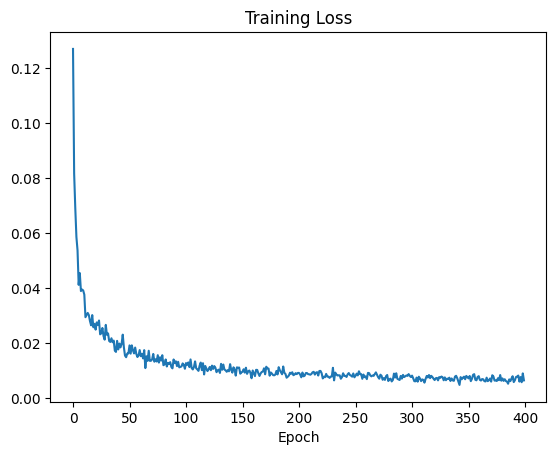

In [ ]:
plt.plot(loss_)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.show()

In [ ]:
def evaluation(dataloader):
    predictions = torch.tensor([], dtype=torch.float) # 예측값을 저장하는 텐서
    actual = torch.tensor([], dtype=torch.float) # 실제값을 저장하는 텐서
    with torch.no_grad():
        model.eval() # 평가를 할 때에는 .eval() 반드시 사용해야 한다.
        for data in dataloader:
            inputs, values = data
            outputs = model(inputs)
            predictions = torch.cat((predictions, outputs), 0)
            # cat을 통해 예측값을 누적
            # torch.cat에서 0이라는 것은 0번째 차원을 기준으로 누적한다는 의미
            # (예를 들어 10x2와 10x2인 두 텐서가 있을 때,
            # cat기준이 0이면 20x2가 되고 1이면 10x4가 결과로 나온다).
            actual = torch.cat((actual, values), 0)
            # cat을 통해 실제값을 누적
    predictions = predictions.numpy() # 넘파이 배열로 변경
    actual = actual.numpy() # 넘파이 배열로 변경
    rmse = np.sqrt(mean_squared_error(predictions, actual)) # sklearn을 이용하여 RMSE 계산
    return rmse
# 평가 시 .eval()을 사용해야 하는 이유
# 평가 시에는 온전한 모델로 평가를 해야하는데 .eval()이 아닌 .train()인 경우 드랍아웃이 활성화 되어 있다.
# 따라서 드랍아웃이나 배치 정규화 등과 같이 학습 시에만 사용하는 기술들을 평가 시에는 비활성화 해야만 한다.

In [ ]:
train_rmse = evaluation(trainloader)
test_rmse = evaluation(testloader)

print("Train RMSE: " ,train_rmse)
print("Test RMSE:",test_rmse)

Train RMSE:  0.05652057
Test RMSE: 0.05652057
